In [102]:
import os
import time
from IPython.display import clear_output
from collections import defaultdict, Counter
import math
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np
import copy
import random

In [47]:
# must have n lines
# read in contents of single file as dictionary
# load all files as idct of dicts
# calculate tf-idf for each word
# get top n 

#sparse matrix representation

## Read in files to dictionary

In [48]:
src_dir = '/Users/choldawa/Documents/Projects/RedditCorpus/word_count/RC_2012-12'

tick = time.time()

d = {}
problem_subs = []
cnt = 0
for file in os.listdir(src_dir):
    path = src_dir+"/"+file
    with open(path) as f:
        filename = os.path.basename(file).split("_")[2].split(".")[0]
        clear_output(wait=True)
        print(f"working on: {filename}")
        tock = time.time()
        print(f"Time elapsed: {tock - tick} seconds")
        sub_d = {}
#         num_lines = sum(1 for line in open(path)) #must have at least 100 unique words
#         if num_lines > 100:
        for line in f:
            try:
                (val, key) = line.strip().split() #invert the order
                if not any(map(str.isdigit, key)) and int(val)>1: # each word must occur more than once
                    sub_d[key] = int(val)
            except:
                problem_subs.append(filename)
        d[filename] = sub_d
end = time.time()
print(f"Total Time elapsed: {end - tick} seconds")
print(f"We have {len(d)} Subreddits")
print(f"Found problems with {len(problem_subs)} subreddits")

working on: CrowdfundedBoardgames
Time elapsed: 88.19347476959229 seconds
Total Time elapsed: 88.1944329738617 seconds
We have 22409 Subreddits
Found problems with 122 subreddits


In [109]:
print("Here are some example first and last items:")
print("Common words:")
print(list(d['america'].items())[:5])
print("Uncommon words:")
print(list(d['america'].items())[-20:])

Here are some example first and last items:
Common words:
[('the', 33), ('a', 26), ('to', 19), ('you', 16), ('in', 16)]
Uncommon words:
[('killings', 2), ('him', 2), ('guy', 2), ('find', 2), ('failed', 2), ('ever', 2), ('doesnt', 2), ('discussion', 2), ('crappy', 2), ('cant', 2), ('cannot', 2), ('been', 2), ('banning', 2), ('badass', 2), ('attempts', 2), ('at', 2), ('as', 2), ('americans', 2), ('american', 2), ('ago', 2)]


In [107]:
og = list(d['america'].items())
random.shuffle(og)
print(og[:])

[('me', 2), ('sure', 3), ('like', 5), ('agree', 6), ('no', 7)]


## TF-IDF Calculations

In [50]:
sub_dict = copy.deepcopy(d) #make a deepcopy (need to copy nested obj)

In [91]:
N = len(sub_dict)

df = defaultdict(int)
for s in sub_dict:
    for w in sub_dict[s]: #count of subs where w appears
        df[w] += 1
print(f" We have {N} sub_reddits and {df['game']} contain 'game'")

 We have 22409 sub_reddits and 3587 contain 'game'


In [52]:
for s in sub_dict:
    for key, value in sub_dict[s].items():
        tf = (value/
                  (sum(sub_dict[s].values())-value)+1)
        idf = (np.log(N / df[key]))
        tfidf = tf*idf
        sub_dict[s][key] = tfidf
    

In [53]:
for s in sub_dict:
    print(s, 
          list(dict(sorted(sub_dict[s].items(), 
                           key=lambda item: item[1], reverse = True)
                    [:3]).items()))

juna []
AnthroClop []
terrariums [('algae', 0.6168095076300031), ('activated', 0.4911433999745335), ('asparagus', 0.35006710655119355)]
oklahoma [('accusations', 0.2796088001556774), ('abuse', 0.2699248635198584), ('accident', 0.23049753326490946)]
hackerspaces [('batteries', 0.5220969726166579), ('applies', 0.4810972924074789), ('hackersmakers', 0.40646058480402025)]
TheContinuum [('bot', 0.6730974055990578), ('above', 0.5952705867997703), ('canadian', 0.4773086326536363)]
GothicMetal [('doom', 0.7793532200117999), ('another', 0.5731304762363413), ('been', 0.3418411108892541)]
metalgearsolid [('adamska', 0.4666749051666542), ('aaa', 0.31335736870781383), ('abandoned', 0.23662484963722713)]
sacmarket []
buddhistatheists [('exist', 0.7241716117528597), ('perceived', 0.4811930996464468), ('meaning', 0.4133924935808759)]
auckland [('ambience', 0.476632120154064), ('ads', 0.40034253919580154), ('barman', 0.30230621375955485)]
Mabinogi [('arakujitsu', 0.3817499639975018), ('accessories', 0.

cringe [('â\x9dâœ', 0.367414811368724), ('â\x9dâœâ\x9d', 0.3566658391615808), ('aaaaaaahhhhh', 0.32694954659929143)]
vallejo [('of', 1.218349824109422)]
LoLScrimSetup []
Loans [('adres', 0.45724070075852524), ('afb', 0.32382577613217267), ('accusations', 0.2858045062791994)]
financial []
waneefestival [('panic', 1.1821394796935163), ('and', 0.4052437543654726), ('are', 0.3875357561131363)]
mayans []
bootroom [('account', 0.29599001201792235), ('ankle', 0.2712554629951689), ('anticipation', 0.25374019763119365)]
DJs [('accapellas', 0.4004343897175573), ('aarons', 0.3747729299773611), ('abba', 0.32503360239537366)]
FragReddit [('allg', 0.5970897244776584), ('allgemeine', 0.5457139379210947), ('abitur', 0.541175243996976)]
EvilLeagueOfEvil [('accomplishments', 0.2514672337477083), ('abilities', 0.2460202104710669), ('aints', 0.22419015093243455)]
anarchafeminism [('cops', 0.4835959324588679), ('harms', 0.4211555734109898), ('calling', 0.4033898222612087)]
Spanking [('backside', 0.46054482

GermanIdealism [('be', 0.7007732847273239), ('can', 0.5107228498321235), ('not', 0.23593511075254645)]
MLPwritingschool [('aj', 0.2966603365176639), ('apposed', 0.2695182049882161), ('actions', 0.26863058056931105)]
tripreports [('alle', 0.6458170419751905), ('benzodiazepines', 0.39713630606122224), ('achieve', 0.3561154705901858)]
lezsaysmoargaming [('femshep', 0.9803288911089905), ('alot', 0.827394606632438), ('liara', 0.6737867426768804)]
eloraam [('leave', 1.7512866112545202), ('make', 0.6704538785839116), ('this', 0.25399081177367866)]
Clojure [('abstractions', 0.4457539072339133), ('abandoning', 0.4309213976636376), ('abandon', 0.3932963235473756)]
LaTeXNotes [('analysis', 1.407217326147617), ('fall', 0.5156672847852407), ('back', 0.44620069910437576)]
PondRule34 [('dem', 1.3888893823018975), ('pond', 0.7017399220220127), ('all', 0.4156044760079895)]
Fittit [('advice', 0.49680146214884147), ('calf', 0.3752442614858308), ('after', 0.2704619424052929)]
capitalstudy [('chapter', 1.6

Jokes [('abore', 0.35460355919368647), ('aaaah', 0.2953874857404496), ('aaaaand', 0.25377618731195994)]
TokyoMoe []
bank []
TheRedLion [('allgrain', 0.25199755616899633), ('adapted', 0.24680425990800214), ('addictive', 0.23636717288351314)]
beastwars []
Lightbars [('a', 0.3600177152561765), ('but', 0.3516703786615113), ('get', 0.2568609271906527)]
Bingo []
uktreesmeets [('birmingham', 0.7377024109909069), ('laserquest', 0.5224055963235612), ('actually', 0.357053134664148)]
Civcraft [('irohs', 2.009251837891505), ('back', 0.5180267765570923), ('tea', 0.45408982406967885)]
elonmusk [('make', 1.0888544162364961), ('was', 0.4655180747551419), ('with', 0.3044750885075748)]
TheFirstLaw [('logan', 0.45942227239881905), ('dragon', 0.44304311492523696), ('almost', 0.4124177405512127)]
dragracing [('at', 0.44286795423165515), ('he', 0.43212812960583663), ('suspension', 0.3925708332387781)]
OffWithHerTop [('deleted', 2.055547299321397)]
RachelMcAdams [('this', 0.8480963771888976), ('is', 0.621477

RedditLaqueristas [('accessorize', 0.3276520187715341), ('aaand', 0.28365869191437026), ('afterwork', 0.24263683826337434)]
ExoLife []
MusicVideos [('chiappetta', 0.8701296798563438), ('album', 0.49272514843160325), ('after', 0.29600897037247914)]
Equality [('abortions', 0.3319399191193942), ('abusers', 0.32296460098415175), ('acclaimed', 0.3015978891413584)]
LoLSuggestions [('aoe', 0.9073299521476047), ('hecarim', 0.4681174388622405), ('cooldown', 0.4332902060444018)]
vinyljerk [('actions', 0.5690713957448735), ('crosley', 0.5214659286161389), ('attacking', 0.36918905118658707)]
DrinkDriving []
skyrim [('aaaf', 0.3225120130972296), ('aaagh', 0.27627582062605094), ('absorbe', 0.25792085640112994)]
undergroundpoppunk [('ohhh', 0.9365591143779837), ('best', 0.6446842975680208), ('as', 0.587938185141905)]
combatarms [('acc', 0.7091792587453382), ('banssuspensions', 0.5505835022331897), ('account', 0.27904825808386374)]
SRSComics [('batwoman', 0.3743953957373453), ('ability', 0.36510676297

longrange [('aguila', 0.46472812219669574), ('adhesive', 0.31748483218078), ('appleseed', 0.23020235125157923)]
BDSMGW [('abuse', 0.28107852605469374), ('bdsmgw', 0.2485007549439007), ('accounts', 0.24407920005456402)]
DonkoSquad [('da', 1.8056673364939295), ('gay', 1.296896088582248), ('weed', 1.0108041709150009)]
OuRR [('deleted', 8.222189197285587)]
MMJ [('accepted', 0.3714330925596111), ('antipsychotics', 0.36644179199016086), ('budder', 0.2732440642030119)]
SecularHumanism [('and', 0.47473761899527833), ('i', 0.22847757475338992), ('in', 0.22248019528950483)]
AirBuccaneers [('cannon', 0.4908361425238522), ('ludocraft', 0.37268138004365675), ('all', 0.2585737737533962)]
FindAGame [('deleted', 3.083320948982095)]
truestchristian [('abraham', 0.4902978225340192), ('ahole', 0.32644842499224386), ('absurd', 0.31009112749388956)]
irishtourism [('killarney', 2.656760527825477), ('ring', 0.6041377596716736), ('its', 0.2543121078377881)]
Santaclaritavalley [('burritos', 0.7822355801053991)

LadyBoners [('\x08', 0.5814315498996229), ('abbi', 0.4523010917595565), ('abed', 0.2972945269668462)]
holidays [('pjurusa', 1.6793267557612452), ('holiday', 0.6454640785144596), ('sale', 0.439247667612339)]
noiserock [('ah', 0.4304950771386959), ('animal', 0.3847820526264209), ('collector', 0.3362582593896159)]
codbo [('akimbo', 0.6738085245683353), ('allaround', 0.4552170045795779), ('annoys', 0.30756286906944574)]
groezrock [('ska', 0.7690737605232013), ('also', 0.4055105886258812), ('a', 0.2521900432480842)]
stljobs [('application', 0.4507806011627205), ('army', 0.4071476431266255), ('allow', 0.38922135155084897)]
piercing [('abscesses', 0.43865889334494007), ('accentuate', 0.3374737521443348), ('abnormal', 0.29704683512251545)]
beardacceptance [('deleted', 1.279553110478612), ('its', 0.6064571939124332)]
ToBeYou [('abit', 1.0282505616039213), ('bands', 0.3831206134710956), ('bored', 0.24581865423201762)]
ExamplesOfGood [('gas', 1.3573693024765454), ('growth', 1.2844769707302455), (

GarageRock [('nuggets', 0.4369714770655835), ('better', 0.41409889601173067), ('bit', 0.35795241105533765)]
ErectileMMA []
MedievalHistory [('armies', 0.5059135349043282), ('armored', 0.4869778082409991), ('duartes', 0.3389535702271292)]
customholsters [('foam', 1.6240400181641323), ('heat', 0.4241088030274884), ('start', 0.31922662621353937)]
xray [('ages', 0.3830142439123829), ('advice', 0.34369581916283515), ('fakeray', 0.30060226791061645)]
childatheart [('codenames', 0.6183477700769618), ('bag', 0.37200188413149227), ('anyone', 0.335461480662769)]
lists [('adam', 0.5092012694950052), ('ads', 0.41914554873735577), ('cocteau', 0.3364226804848839)]
2xcBestOf2012 [('heya', 1.2675113676332745), ('subeddit', 0.6997803034678028), ('nominating', 0.6846329814245791)]
FormulaFeeders [('allergies', 0.7151480327224384), ('advance', 0.5153990668375781), ('ar', 0.4149858904865068)]
ilovekushpc []
Seahawks [('ackley', 0.2529543652386412), ('accolades', 0.24849822852962594), ('abandon', 0.2090880

JPII [('but', 1.0604725895147218), ('i', 0.4782935071147612)]
AtheismComingOut [('acceptance', 0.5013712998709853), ('athiest', 0.3375606171120185), ('active', 0.29234714277280527)]
eaganmn [('from', 1.5408477901448734), ('the', 0.29371278531999834)]
SocialSensei [('anchor', 0.9244217826372846), ('competence', 0.5268711268024316), ('cohesive', 0.5208752672845804)]
Jojo []
avatarvideos [('amateurs', 1.7915188198882426), ('harsh', 0.3954500079211785), ('because', 0.34117877090104415)]
souleater [('banners', 0.39794608821547145), ('cronas', 0.36952741824114577), ('actual', 0.3088962752865071)]
GoneMild [('ankle', 4.282139175332899), ('like', 0.5104107322467291), ('that', 0.2571466544298208)]
creampie [('alannah', 2.9772029625335192), ('mae', 0.4167182700262649), ('lucy', 0.38606944470564103)]
NCAA [('christmas', 0.5473794657448742), ('quarterback', 0.38799479367887735), ('enough', 0.3394721233724172)]
UoRBlender []
bestof2015 []
letsplaysomething [('you', 0.6292336036441243), ('i', 0.5871

ShouldIbuythisgame [('absolutionspoiler', 0.47768686357786355), ('aaaaaaaaaaaaaaaaaaaaaaaaa', 0.43464503029811263), ('abound', 0.2698224415708632)]
gundeals [('aaaand', 0.6116355211580042), ('aftermarket', 0.5115402386253298), ('arfcom', 0.4802681074061828)]
DylanRyder []
linkbuilding [('as', 0.564015830903371), ('at', 0.4020717391624534), ('site', 0.363888850943099)]
GoneHoot []
MelisaMendiny [('apologies', 0.9971411405066214), ('dream', 0.48051759040592124), ('d', 0.3834088956997296)]
t:victorian [('gown', 1.271523463520207), ('era', 0.7865399926645115), ('victorian', 0.5668624777900906)]
Dreamweaver [('choose', 0.8532920257385732), ('width', 0.5108251765880544), ('can', 0.4566887992369448)]
Spiritpokemon [('choose', 3.257447370791036), ('you', 0.41948906909608286)]
ragetoons [('face', 2.893990718729852), ('the', 0.4405691779799975)]
EnglishMajor [('fear', 1.6688211231299404), ('good', 0.44815592439896923), ('thank', 0.39577247702757556)]
hcfactionscirclejerk []
mlas1emotes [('autoge

ketogonewild [('bigger', 0.764846435198786), ('fat', 0.4973847880479431), ('keto', 0.30221495151447564)]
vegetarianketo [('appetizer', 0.46457707917497504), ('asparagus', 0.40899070902356227), ('avocados', 0.3748429226851875)]
MyFriendsYourFriends [('lot', 0.8575316453704513), ('a', 0.4907510690187592), ('to', 0.20353968255241708)]
dundee [('abertay', 2.882264612257546), ('bells', 0.39864660999892854), ('always', 0.3712868398724227)]
filmfashion [('by', 0.38807584763986075), ('a', 0.37105383781497475), ('but', 0.3589889980325931)]
weedpunk []
socialnetworking []
hetalia [('aldmeri', 0.8279146992777534), ('alice', 0.44541913266576016), ('aushun', 0.4200268033324616)]
subsubredditdrama []
WizardryOnline [('artstyle', 0.6216157883846156), ('active', 0.396458340814806), ('able', 0.3005367071790692)]
perfectgift [('amazon', 0.5092608516333862), ('animals', 0.4806505256978514), ('absolutely', 0.4209157164089848)]
gunsmithing [('fullauto', 1.2351794665412572), ('manufacturer', 0.4354974397473

PoliticalDiscussion [('abandonded', 0.26984749217626275), ('aba', 0.2103237012996816), ('abate', 0.2078280634297496)]
gaming [('aaaaaaaaaaa', 0.24510467178331605), ('aaaaaaaaaaaaaaaaaaaaa', 0.23993810980682273), ('aaaaaaaaaaaaaaaaaaaaaaaa', 0.23497117448291246)]
BackOnYourFeet [('addadhd', 0.891111555328312), ('adhd', 0.5476851907633), ('action', 0.34901428070646606)]
p4u [('aigis', 1.524902003198529), ('arena', 0.3615879288132994), ('able', 0.3308730586554862)]
QuantifiedSelf [('as', 0.9260605143505375), ('on', 0.4465331900452777), ('i', 0.2764266434097353)]
vocalists [('are', 0.44067778853479406), ('a', 0.43097614163841763), ('really', 0.23617777697529263)]
linuxquestions [('acrobat', 0.36895569253690097), ('alexisdellalexis', 0.3026591950986342), ('accessed', 0.29463442917867805)]
dogpictures [('abby', 0.47402590781948295), ('ahnyong', 0.4481443649283166), ('adorbz', 0.39043564432867883)]
lockpicking [('abus', 0.5779262170070473), ('aedalas', 0.5763913841128813), ('aloa', 0.40733005

homestuck [('absconding', 0.353617115858939), ('aaaaaaaand', 0.32529672401465654), ('abraxas', 0.3159703431929555)]
Craps [('craps', 0.5440742805018642), ('actually', 0.31208527819313836), ('about', 0.2819786389411032)]
braswap [('centergore', 0.32198056544225184), ('address', 0.28812367921728554), ('above', 0.2799725495577732)]
AutomatedMarketing [('blog', 0.5716517285686645), ('contact', 0.3632000597386211), ('data', 0.3053307484892126)]
ElvisDuranMorningShow [('philips', 3.3946061485786267), ('deleted', 0.43178104319349825), ('this', 0.19645273277113845)]
NCTC []
Julian []
knapping [('chert', 4.758059583262626), ('for', 0.2686690724489061), ('the', 0.18881536199142748)]
prorock [('and', 0.44167158295692255), ('in', 0.3095608650686921), ('it', 0.2039086788192373)]
bodybuilding [('abbs', 0.4628631815223661), ('actioncomedy', 0.23735042028691272), ('absorbing', 0.2304775253002344)]
animalromance [('apexpredatorfucking', 1.022689036037241), ('baddass', 0.5409947711105336), ('arousal', 0

commandandconquer [('allying', 0.8591861000868072), ('ally', 0.5771639367097725), ('air', 0.3618997697162354)]
datacenter []
hollywoodundeadforum [('atleast', 0.2783660694612571), ('bands', 0.23929215921160535), ('dahlia', 0.23856478917511556)]
ALS [('for', 0.7818635328540715), ('not', 0.5393447837059312), ('of', 0.2436699648218844)]
grouperfish [('sale', 0.9468812853045211), ('for', 0.45338362345226335), ('of', 0.25265610951406137)]
Kailvin [('flags', 3.0545913996046936), ('interesting', 0.3932006080780686), ('for', 0.32457074689725446)]
Embroidery [('amaya', 0.8987249489315492), ('ability', 0.3674801693417462), ('beginner', 0.216465312072927)]
abortion [('anaesthesia', 1.1037546534063056), ('abortions', 0.7766527533481251), ('blurry', 0.3120411694565815)]
tarot [('acetwothree', 1.1670583192683872), ('archetypal', 0.354943094613103), ('achieve', 0.33069539197113534)]
alwaystokeabowlagrow []
AvailMidst [('buildcraft', 2.0973256126660837), ('skycity', 1.0047303889460557), ('crash', 0.77

photography [('abell', 0.28655031233355344), ('abi', 0.23906169723131387), ('abour', 0.23210661168777422)]
KarmaBox [('the', 0.881138355959995)]
SRSZone [('aw', 0.527719265268614), ('cockatoo', 0.4597824857532006), ('bar', 0.3291928478000757)]
germantrees [('bereich', 0.6658124410578958), ('alle', 0.5244214677228345), ('darf', 0.5203731189796768)]
NewOrleans [('aba', 0.4682154394550363), ('aints', 0.25562003633579966), ('angeli', 0.24858239660847287)]
estp [('estps', 0.75277294247709), ('end', 0.4129660292182884), ('but', 0.3372371392258825)]
requests [('anyones', 0.9945716359011612), ('httpimgurcomdyvdr', 0.6976591067624335), ('any', 0.3930726167498776)]
BLoDM [('alchemist', 0.4639802544632792), ('alchemy', 0.4127739937630941), ('adjust', 0.32842563222550325)]
Lahl []
metacirclejerk [('acrtlfd', 1.1489689607742883), ('abso', 1.0407574191126658), ('metametacirclejerk', 0.6095586247228347)]
catsgw [('balcony', 2.1256494019081966), ('foot', 1.0219157055991732), ('he', 0.5436838373768275)

karate [('abs', 0.40761759926270563), ('adrenal', 0.33930918566274637), ('accomplish', 0.2931600785347895)]
illusionporn [('anticlockwise', 0.6573475337696127), ('alienblue', 0.5870823842712124), ('arrows', 0.2747042719737247)]
BBAPCT []
bandfwp []
yusufcirclejerk []
saveon [('deleted', 2.055547299321397)]
flightattendants [('httpwwwflightattendanthubcom', 0.7726657036144806), ('fa', 0.47398179298345805), ('bag', 0.4447127695389697)]
PalermoStreetClub [('age', 0.6803170588330288), ('dubstep', 0.4527681758183012), ('curse', 0.43601574509421626)]
synthpop [('apop', 1.342854826744572), ('devision', 0.7246459236842929), ('andrew', 0.7169361533004663)]
typescript [('dest', 1.6489768611005262), ('intersectrayraystart', 1.1982536526302145), ('rayend', 1.0035140159651013)]
ausenviro [('illegally', 1.3435544554983767), ('timber', 0.8980370090348286), ('italy', 0.8444878593911986)]
AskAnyQuestion [('atmosphere', 0.45804291095344546), ('extinction', 0.35338652860021263), ('fungi', 0.3257502855112

stufftowatch [('superbrands', 20.0344358857263)]
BraveryJerkJerk []
FTLStrikers []
Paramedics [('classic', 0.7023569090296795), ('cardiology', 0.6908216955723747), ('been', 0.36983229096082976)]
retroist []
fotograf [('der', 3.6359578153533407), ('ist', 1.4894742447563851), ('in', 0.21662801940549287)]
nonprofit [('amersfoorthttpwwwjokeanninknl', 0.9464395338822027), ('ankara', 0.5871305531845982), ('abandoned', 0.42316421530805076)]
FoodAllergies [('insurance', 0.7616179252028704), ('santa', 0.6345797758846454), ('as', 0.32992116363599916)]
Audi [('allroads', 0.36403611741615993), ('accelerate', 0.3620618900214884), ('acceleration', 0.3207840463473137)]
FoodDev [('beet', 0.4920402480021173), ('brie', 0.40931197050307466), ('able', 0.33705102482874705)]
animeotakubullshit [('none', 4.711381723009267)]
Muricanized [('cw', 0.8703977293219746), ('american', 0.548120633385322), ('complex', 0.5331251687995597)]
dbz [('absorptions', 0.44060818887216513), ('abomination', 0.2676156976465071), 

Glocks [('acquisition', 0.2930474845694708), ('abroad', 0.2908606746795242), ('ameriglos', 0.26987108363522533)]
CanYouDrawThisForMe [('best', 1.1044270405666006), ('do', 0.4881898528840342), ('deleted', 0.41468263914310827)]
freedownvotes [('karma', 0.9704789571534507), ('screw', 0.85476560806418), ('a', 0.3345381194784511)]
Pectus []
umineko []
Requian [('construction', 0.9122364056785692), ('directly', 0.47037158325697087), ('d', 0.42494398324102506)]
shittyvoicebattles []
StopDementia [('had', 0.7234027759160858), ('and', 0.5388762929358788), ('on', 0.22117714475679875)]
Nujabes [('bandcamp', 0.5341644235858148), ('again', 0.2998274104198839), ('beats', 0.29000558029255635)]
Abrahamic [('derived', 1.105311136218689), ('scripture', 0.6504965778232283), ('loving', 0.4081944048894949)]
Red []
sticker [('address', 0.6038972396785265), ('blank', 0.38469617211103324), ('detroit', 0.26670143007440344)]
Psychonaut [('absurdist', 0.2895648570220638), ('abrahamic', 0.27361124951573423), ('ac

haxel []
AgotLCG [('also', 1.2377006124805499), ('and', 0.32669332798887635), ('or', 0.27409419830818416)]
bigdata [('build', 0.5646507949472785), ('nosql', 0.5610858978428549), ('hadoop', 0.527160353427024)]
netjerk []
tampa [('absentee', 0.4473652407336466), ('accreditation', 0.31558461952168076), ('ach', 0.2826429462794405)]
NTI []
bootstrapping []
GrumpyCat [('clintclimaxhttptwittercomclintclimax', 0.5266410068745819), ('above', 0.36989211600051347), ('baby', 0.3190580829979356)]
gonewilder [('name', 0.7019668004302814), ('is', 0.5756680513186733), ('my', 0.45718524234787067)]
collegeredraftproject [('ago', 0.4466989255531572), ('allow', 0.4144632058632855), ('bid', 0.4139850042633605)]
jedisloths [('i', 0.646958424614363), ('the', 0.2750514878148626), ('to', 0.20353968255241708)]
BlackHistoryPhotos [('article', 0.48512880715678974), ('bar', 0.42733225272104725), ('digging', 0.41682344008540456)]
SAIT [('and', 1.2927622582026095), ('the', 0.33042688348499816)]
antiwar [('amazement'

pics [('ää', 0.23713959875274948), ('aaaaaaaaannd', 0.21009396933958893), ('aaaaaaaa', 0.19191902934249175)]
tylerstopignoring []
AutoHotkey [('amp', 0.6890776806767615), ('rbutton', 0.43805903968765264), ('full', 0.3269632548875927)]
Sackish [('golfcart', 0.46072521965042335), ('aka', 0.3963248379421834), ('dey', 0.37072155815684354)]
circlebrokecirclejerk [('advantaged', 1.0801635468925364), ('assbackward', 0.8416011991912752), ('ama', 0.4282941786865616)]
Midcyru [('feir', 0.7772628211738816), ('able', 0.3788220856755717), ('chris', 0.3700509997807768)]
WoTreread [('advanced', 0.5847588786302202), ('angry', 0.41142946174643413), ('elayne', 0.3450470519704247)]
CutePurpleDinosaur [('adored', 0.5268827835877582), ('accounting', 0.4277788136441941), ('automoderator', 0.40281251245517613)]
cisscum [('gtall', 0.6918773316454534), ('gtshe', 0.6656878634950724), ('gta', 0.5976515082791304)]
Badgers [('when', 0.6095571959626191), ('to', 0.4481784014880938), ('is', 0.3511122604328738)]
Facer

vfx [('adelaide', 0.3751603389072107), ('academy', 0.30252376624107885), ('aides', 0.2619757555260579)]
nomorals [('by', 0.47085846266281756), ('good', 0.3247878622971774), ('retard', 0.3140409267995783)]
Colombia [('abrir', 0.7216617747501959), ('acordeones', 0.6607476519674071), ('aca', 0.46846638604720614)]
NZCirclejerk [('balchynz', 0.6103427712638598), ('accept', 0.4015387687575512), ('arrogant', 0.3184738310206154)]
PercyJackson [('against', 0.34008528868701315), ('births', 0.33570303386910144), ('able', 0.32896424721444534)]
Ailee []
globalagenda []
GameRanks [('posts', 1.5255747460070714), ('game', 1.4508748697519154)]
Dakewlguy []
minithings [('you', 1.2584672072882486)]
pesfan [('terra', 0.36619481526029296), ('refs', 0.36540784764339707), ('are', 0.2907408871196181)]
Archivists [('archival', 0.8534136701628343), ('digitization', 0.3459504426276201), ('agree', 0.30617737292680347)]
politicsdebate [('boehner', 0.8513589153711912), ('billion', 0.5132541617012305), ('constituent

premeduk [('academically', 0.7147447953357421), ('alevel', 0.6988555939901305), ('anyhow', 0.3356298935637302)]
lifeaquatic [('captivity', 0.4979557862030544), ('chile', 0.36891791574974114), ('animal', 0.3641003005462722)]
cocaine [('accustomed', 0.3758691966718539), ('accepted', 0.27755568997814445), ('ability', 0.2546980075192852)]
Veterents [('on', 0.8925113454914237), ('this', 0.2635393852755144), ('the', 0.2530830358174471)]
rilakkuma []
stare [('smile', 0.82870009121061), ('just', 0.3995950639185436), ('and', 0.3917875245656631)]
helloproject [('airi', 1.2679719532106677), ('ayumi', 1.1671346861902752), ('akari', 1.163703190929939)]
FunnyYahooAnswers [('to', 1.0176984127620854)]
srbija []
steezecave []
LifeRPG [('assign', 0.462721776781235), ('again', 0.29633210071694177), ('appreciate', 0.27775601038020703)]
ShittyDebateCommunism [('bourgeoisie', 0.2818486261206631), ('banning', 0.24838394550336224), ('babies', 0.2370097269495445)]
pregporn [('her', 1.5431350474875922), ('i', 0

AskWomen [('aaaaa', 0.2516407934495113), ('aboust', 0.23275886517635597), ('aboutlove', 0.22806388576658004)]
cripplingalcoholism [('abw', 0.4494743382237253), ('acknowledgments', 0.33286984498909683), ('aas', 0.30974863400298)]
askathirdgrader [('answered', 0.6002292133062043), ('answer', 0.46416421665828433), ('histeria', 0.4138497272455804)]
scatporn [('about', 0.5845976418189776), ('been', 0.4840488356603378), ('few', 0.3395963213696843)]
researchchemicals []
InfrastructurePorn [('ac', 0.33532803152373236), ('alps', 0.3329124361474427), ('aesthetics', 0.3284498882836281)]
alcoholism [('aaorg', 0.6968707066792755), ('aana', 0.6060984092261418), ('abruptly', 0.33766237655212156)]
tbreaks [('breaks', 0.7228997978348827), ('depression', 0.530802481938201), ('after', 0.4193636600933518)]
Treebangers []
relaxation [('and', 1.1466171081783507)]
SportsManagement []
vids [('man', 0.4194085403373422), ('a', 0.3813138212340752), ('and', 0.2610991565413832)]
computerforensics [('acquire', 0.57

tips [('of', 1.218349824109422)]
thenoobleague [('even', 1.1432193361844543), ('in', 0.33908264483128825), ('my', 0.30159786505367164)]
dvdcovers [('kombat', 2.292373493223731), ('mortal', 1.697579295345642), ('i', 0.18698570338884996)]
Fapucational []
DoILookLikeAMouse []
SomebodyMakeThis [('archiving', 0.6220333876884268), ('able', 0.339132753662519), ('amazon', 0.3029175181432136)]
fceyn [('exactas', 1.6006877927003078), ('esto', 1.2315572139845348), ('en', 0.7414508143535716)]
SeattleITAP []
peace [('aside', 0.8906734300567074), ('healing', 0.7475509625639318), ('ask', 0.5043837703549037)]
truegaming [('aaaaaah', 0.27791213013946287), ('abosuletly', 0.26068595486673496), ('abercrombie', 0.186264657246501)]
Hyperion [('books', 1.1562948116476068), ('map', 0.5323900562420507), ('either', 0.4478260139139535)]
waterpoloboobs []
Layer [('cock', 14.728654765460368)]
ReactionVideos []
Falafeltree []
SamuraiChamploo []
gavin19 [('here', 1.9694145111242272), ('spoiler', 1.77575573696352), (

creepyPMs [('aaaaaaand', 0.3353967865142317), ('aback', 0.25657787981766106), ('aaaaand', 0.25632135594437)]
CharlieParker []
InTheStudio [('album', 0.641693982450628), ('beats', 0.4256736960260449), ('claim', 0.23923092286072942)]
smodcast [('brantford', 2.8965614418512264), ('halifax', 1.408342185196044), ('been', 0.35540036806615577)]
kernel [('dol', 0.7904396664903992), ('anymore', 0.5284186787291861), ('boot', 0.48745111251298257)]
Genesis [('cryme', 0.733083486745549), ('hackett', 0.4520456313014436), ('amp', 0.4077159877920906)]
Superjail [('in', 1.3269402151844778)]
Maricopa [('bots', 0.9764852593809398), ('numbers', 0.32122179285866426), ('come', 0.3004054838659104)]
ColumbusVegan [('curry', 1.5346857356755603), ('delicious', 0.8845009959294988), ('map', 0.46478535037147534)]
Gamingcirclejerk [('ammo', 0.31330937267957815), ('ah', 0.29646011780399334), ('allowed', 0.2888723504046631)]
Skohmcraft [('skohms', 0.32527402086735363), ('about', 0.2868253533873492), ('empty', 0.28568

microsoft [('abject', 0.413571576972653), ('accountants', 0.2829924669695618), ('abstract', 0.25715442001415106)]
StopPoopingYourPants [('floor', 3.455916530769006), ('is', 0.3913305271660095), ('the', 0.176227671191999)]
rpgtrade [('but', 0.5676651181245723), ('in', 0.29722568908775315), ('up', 0.20938324059750935)]
SantaFe [('downtown', 0.6428750327138765), ('matador', 0.5579759642420824), ('paseo', 0.511560594744437)]
Network [('changed', 1.278777102347512), ('full', 0.7537210268051292), ('issue', 0.5194033382591472)]
nsflvideos []
herpetoculture [('adults', 0.49437348499878364), ('cbb', 0.4223465873743286), ('animals', 0.3954991048159479)]
HealthyFood [('bring', 0.6600578172550575), ('fruit', 0.4567079876513857), ('are', 0.34328771112836104)]
OhioEnts [('cops', 1.2141292996120794), ('ohio', 1.1752878577355204), ('smoke', 0.7607455367911546)]
galcon [('around', 0.9121669854697315), ('o', 0.566922618897574), ('servers', 0.5359707819336806)]
beardbrand [('beard', 2.056680595911605), (

EmoScreamo [('acoustic', 0.5109353907701181), ('alta', 0.5105791661174779), ('aussitôt', 0.4693691057513946)]
japan [('accomodation', 0.26265493540359014), ('abbreviation', 0.25074301815655387), ('accusative', 0.2498046065229821)]
laffytaffyjokes []
redheads [('adorable', 0.3519079278572737), ('ariel', 0.3364500957517737), ('active', 0.3188380544021791)]
queerottawa [('is', 0.8571174505757737), ('that', 0.4501569745568351)]
TheDark [('does', 1.7306480978996237), ('would', 0.6799646910864686)]
circlecringe [('nerdy', 2.2184554098999563), ('so', 0.31916620627968195), ('are', 0.23473646661394756)]
police [('academy', 0.5924953154604581), ('anon', 0.45106886935191415), ('actions', 0.35633560920837204)]
rollingstones [('beatles', 0.6102816696811634), ('concert', 0.3626376735442204), ('dice', 0.3514859831405865)]
alexander []
AdFly []
FleetwoodMac [('come', 0.48626091500570284), ('be', 0.3317050564524647), ('saw', 0.3170882763233367)]
FoundWords [('correct', 0.5525660769862004), ('pronounce'

AlienBlue [('accidently', 0.34135406331406504), ('abs', 0.33626994139191596), ('anybrowser', 0.329435371005662)]
learnspanish [('á', 0.8272240321591752), ('alguien', 0.5227523913695173), ('americano', 0.4721985065620202)]
Gerstelism []
BiblicalArchaeology [('a', 0.5781005382004637), ('my', 0.3289325149530254), ('i', 0.27533087459001165)]
Hewlett []
reportthetrolls []
VPS []
CanadianTV [('billable', 0.8741946429563046), ('crabtree', 0.49255552647349593), ('dispatching', 0.4328286750294261)]
punkdykes []
anime [('aaaaaah', 0.2700808506164103), ('aaaaaaand', 0.2342656434977218), ('aaaaaand', 0.19577700542589344)]
reditrbugs [('app', 0.6295362193715143), ('backup', 0.4681866169046604), ('columns', 0.46301194211709523)]
hawkthorne [('abba', 0.688727974218158), ('achievements', 0.33309493828367315), ('annies', 0.32444744220280186)]
CommercialRealEstate [('brokers', 0.5555937434296864), ('broker', 0.533050265771108), ('available', 0.26424164992432636)]
spoderman [('k', 1.6243755916809832), ('

interestingasfuck [('blog', 0.45782610431588344), ('boxes', 0.4458805543168274), ('cracked', 0.29193782873474905)]
sitonmyface [('blue', 1.2531659723579187), ('deleted', 0.4290468666404819), ('a', 0.3343084343604262)]
BikingATX [('advocate', 0.6463969394391234), ('appropriate', 0.30173891719943224), ('actually', 0.2902197666018567)]
TransformerInfinity [('he', 1.6315862876816762), ('i', 0.2869761042688567), ('the', 0.2680695958865184)]
backstage [('accepting', 0.512876003107794), ('asm', 0.43479357923833184), ('ambulance', 0.4181967976942919)]
ClassStruggle [('arab', 2.040451649072513), ('printemps', 0.9292818990950361), ('panda', 0.52628661915288)]
popcult [('baby', 0.5278354948854211), ('after', 0.4279879240311619), ('kardashian', 0.37970220733399623)]
Spiral []
BritPop [('verve', 0.8067317227318086), ('favorite', 0.5495553658912115), ('a', 0.2554776992027405)]
letsmakefunoftheamish [('menno', 1.5465785183757608), ('zipper', 0.6133172821329287), ('gives', 0.5610895389716499)]
epicstr

webdesign [('abnormally', 0.3507343742378072), ('accessing', 0.26787352866684094), ('accountant', 0.2587331413246907)]
Models [('crosspost', 0.5939561645112574), ('rcandiceswanepoel', 0.3790480048961338), ('customer', 0.3703477740254655)]
LovingBudgies []
UTT [('campus', 0.7849268691371262), ('meetup', 0.4529895437138245), ('statue', 0.45074002434952487)]
MRActivism [('forms', 0.5318355106640609), ('penetrate', 0.41478091544890894), ('unwanted', 0.40947766392312535)]
MelissaBenoist [('amazing', 0.9622852036414518), ('episode', 0.8869836191967355), ('pictures', 0.6843568701271244)]
uwo [('arash', 0.37995162015983525), ('accessible', 0.31620001273674103), ('admitted', 0.29777453697657535)]
magicgathering [('lieutenants', 1.168533277157728), ('lieutenant', 1.0944408376281725), ('emperor', 1.065650699089742)]
OliviaHolt [('in', 0.6850547523370129), ('one', 0.5845288339285096), ('the', 0.352455342383998)]
swole [('brodins', 0.5723926579451847), ('active', 0.4247660357292217), ('brethren', 0

nuzlocke [('absol', 0.49226503520810194), ('aboard', 0.3175161469718638), ('aggron', 0.3009909253978457)]
yoyohoneysingh []
poetsmackdown [('apparent', 0.408197791336985), ('author', 0.3063405381935945), ('again', 0.267927633609726)]
CharterCities []
OneEurope [('oneeurope', 1.898033530096699), ('civil', 1.311949760610704), ('european', 1.087482416625748)]
drugsarebeautiful [('adderall', 1.0497784761320372), ('capsule', 0.43397625282343727), ('bag', 0.3380126536726813)]
coldfusion [('applicationscoped', 0.8558255367506906), ('applicationx', 0.8145765261131978), ('appx', 0.5251113759429773)]
Shazzers [('armed', 0.3052661726702007), ('against', 0.2969821863999376), ('drydock', 0.267828985993871)]
Detroitcityfc []
AQW []
hitlergw [('dont', 0.7785075237101972), ('just', 0.29821762190691953), ('it', 0.2841987279401215)]
NoNet [('any', 0.45001144581477265), ('control', 0.3671562173350774), ('been', 0.3473671187131806)]
oddworld [('ask', 0.5312945045544836), ('munchs', 0.5165471748919358), ('

bicycling [('abouthero', 0.334914906572006), ('abraded', 0.3031412728955087), ('abled', 0.257660688359101)]
stupid [('as', 0.31805201236558367), ('how', 0.3123602587819527), ('many', 0.27506774994705263)]
leangains [('aaah', 0.3450301056040785), ('abdominal', 0.3284142254077391), ('abit', 0.29098146204495207)]
Catholicism [('abba', 0.3282012574924293), ('accipere', 0.32148202343678955), ('adelphophoiesis', 0.25939178741762237)]
exoplanets [('centauri', 0.9417442479382535), ('ceti', 0.8806209696301502), ('alpha', 0.6971506126699403)]
pokemontrades [('absols', 0.47740419543465884), ('aaah', 0.30367025205116044), ('accualy', 0.28330279789010093)]
soviet [('alright', 1.2389784264725707), ('email', 1.0181627452561834), ('hello', 0.9677064281911536)]
phxcirclejerk [('dibs', 0.7269759526579729), ('es', 0.5547056346838181), ('attention', 0.44939349849507976)]
traders [('ac', 0.5868307352423656), ('betting', 0.30634404569986784), ('able', 0.293796951137302)]
UALR [('the', 1.76227671191999)]
sof

conspiracy [('aangirfan', 0.34081233984640347), ('abbottabad', 0.29084985046952355), ('abiotic', 0.2299995654306582)]
FuckThis [('before', 0.3866137743973031), ('better', 0.3112968770945867), ('as', 0.30585544678585797)]
uotampa [('exams', 7.666138103851335)]
LightNovels [('author', 0.4740376967822981), ('enhanced', 0.3600992431906352), ('conversation', 0.32122450920775714)]
ThePutzCast []
Gamelan [('of', 0.7121633686696491), ('this', 0.4125507388193908), ('to', 0.29822220698004015)]
Minecomics [('make', 1.4105507171379337), ('i', 0.4334888854251229), ('it', 0.31007453613740354)]
Nantes [('advanced', 0.4730686402372056), ('connaissance', 0.3376486112958108), ('bilingual', 0.3271123166312412)]
VoluntaryHippie [('a', 0.557804441774844), ('and', 0.32908835288486105), ('was', 0.2522557306602525)]
SiouxFalls [('camilles', 0.48176440625734546), ('anywhere', 0.28269085096309166), ('br', 0.2751366155958621)]
Waco [('antioch', 0.4321863075486957), ('algebra', 0.4083555359595762), ('barnetts', 0

asheville [('abtech', 0.805607216874238), ('accommodations', 0.3985866850563361), ('accepting', 0.25662220207117686)]
MyBloodyValentine [('cosmicdust', 1.7981275666521952), ('band', 0.7969976785109016), ('mbv', 0.3956019689907397)]
AlfaRomeo []
KnitRequest [('affordable', 0.5094604431293985), ('above', 0.3270280568405934), ('crocheted', 0.3259844434471435)]
Xaloria [('arena', 0.42213155766899224), ('account', 0.40784919695650307), ('beacon', 0.3518123612028593)]
Gears [('i', 0.6559200245325033), ('this', 0.4583897097993231)]
transgendercirclejerk [('antiandrogens', 1.1358762551042747), ('ally', 0.6700497214558735), ('approved', 0.4543434309259116)]
Amazing2 [('desishen', 1.3602501497512776), ('deside', 1.2252225773469743), ('ewry', 1.1758832570773317)]
NYList [('available', 0.481582146767885), ('ball', 0.45625774786426637), ('crossed', 0.3622289492982269)]
circusjerk [('dis', 1.416358410807376), ('de', 1.0997082224132837), ('am', 0.5462630977887872)]
birdsofprey [('amur', 1.21777363549

BotanicalPorn [('absorb', 0.41568339414560107), ('adaptation', 0.40979621518993764), ('aralia', 0.3861416113551059)]
ottawaandroid [('android', 0.8398272115489887), ('an', 0.42540079974051537), ('file', 0.4213395209669027)]
TheTerminal [('alphastryk', 0.49041164485037697), ('asianza', 0.37304956686507085), ('achievements', 0.32182800682587515)]
EnginePorn [('incredible', 1.010604246229672), ('engine', 0.9846825055341952), ('link', 0.5140541001180123)]
alone [('about', 0.6739087765377139), ('anyone', 0.5242383862555982), ('feel', 0.26095638850784525)]
Swingers [('accidental', 0.4548408904159634), ('advanced', 0.25778211819031355), ('active', 0.23305293309984595)]
spacebuildwarserver [('more', 0.5658480466027821), ('and', 0.5241608978285435), ('of', 0.22579224948799748)]
butt []
RunForIt [('account', 0.5608751869408726), ('candidates', 0.40336628528023427), ('answer', 0.35905872078274687)]
audiology [('display', 1.1004074924553058), ('be', 0.3531392048706895), ('dont', 0.2847644205233546

computers [('adh', 0.38877954032881984), ('agp', 0.28637053239151716), ('accessing', 0.2832902913072743)]
MineZPolitics []
Pashtun [('into', 1.3550409484761696), ('on', 0.7211660819936306), ('the', 0.22028458898999875)]
canoeing [('in', 1.3269402151844778)]
Domain []
midlands []
SDLC []
Allods [('chained', 0.9251656388280027), ('combos', 0.6347357311816303), ('because', 0.38228063730977474)]
CompulsiveSkinPicking [('acne', 0.7543748994005177), ('afraid', 0.3112169187932847), ('advice', 0.2989593909921958)]
EveryoneExceptLapper [('it', 0.7807507976972979), ('was', 0.5885967048739225)]
AtlanticDivision [('hockey', 0.7124843011486094), ('dream', 0.5674673093298521), ('all', 0.4332682915036529)]
tejanos [('tejano', 16.45091694727019)]
Raspberry [('rpi', 3.148309893105357), ('if', 0.35559756827071626), ('is', 0.3426335496515226)]
redditdynasty [('aaron', 0.5615423522895691), ('aboard', 0.4669244930141327), ('acquire', 0.346188896161047)]
Militaryraging [('are', 0.3428074300070942), ('at', 0

halo [('abad', 0.33476243878481804), ('aaaaaaaaand', 0.2654909931658239), ('abondend', 0.26309606666639046)]
scouting [('badenpowell', 0.6213809222723254), ('baden', 0.5454115192522608), ('acceptance', 0.5000247433585776)]
Classycraft [('arena', 0.9421987955150632), ('burn', 0.4298616796521367), ('dis', 0.387817018113885)]
SalvadorDali [('never', 1.9298864520365326), ('this', 0.4583897097993231)]
PHX [('access', 0.9172561612034552), ('grandfather', 0.5590393123569765), ('paternal', 0.3713190948436314)]
postanarchism [('immanence', 0.46450500604944805), ('agree', 0.4070738383381385), ('laruelles', 0.3930852592636137)]
ArizonaBeer [('chocolate', 0.7286949182508458), ('craft', 0.6492827738742946), ('beer', 0.2719553472297075)]
ExplainLawLikeIm5 []
liveactionroleplay [('haul', 0.8226293472951339), ('fight', 0.6851794157591171), ('shanties', 0.6711444255125852)]
twoshits [('stanza', 0.38176800398551536), ('are', 0.32065258546292613), ('poem', 0.2646679049605489)]
versus [('deleted', 2.05554

spotify [('advertisers', 0.4397129247386124), ('additions', 0.40189098550056407), ('acid', 0.3881278589502511)]
Reston [('me', 1.354042884465314), ('the', 0.4405691779799975)]
gayasshole []
Quakers [('evangelical', 0.3546965451965943), ('christian', 0.3495888968409156), ('conservative', 0.3304364153319906)]
physicsgifs [('absorbed', 0.45777696170217874), ('agitated', 0.350072447702944), ('ability', 0.2911615243708431)]
SocialHelp [('commented', 0.8443899774916831), ('cunt', 0.7727996108287924), ('being', 0.39195105754610476)]
DownhillSkating [('bummed', 0.5497680173097313), ('charity', 0.43213441627996574), ('gullwing', 0.37202576492296874)]
U2Band []
FFFFFUUUUU []
ShinChan [('the', 1.76227671191999)]
calupa [('add', 0.7574010001652561), ('facebook', 0.4375729767548911), ('also', 0.34273146412936745)]
DeadlyPremonition []
ComputerClassWithMrH [('found', 0.8159037581475053), ('but', 0.5516976377576471), ('im', 0.33391683062937916)]
ReefTank [('acclimated', 0.48291320097973156), ('aquacu

OkCupid [('aaaaaaand', 0.24282649948608687), ('aampe', 0.24148481333351898), ('abbreviate', 0.2277568011651411)]
Dulcimer []
firstworldalcoholism [('daniels', 0.5799631901863779), ('bottles', 0.46109370684789436), ('after', 0.4126292627434882)]
BTFC [('aas', 0.4635415302945649), ('allthatfalls', 0.4475299392378458), ('accessory', 0.35343842425032423)]
foretell [('biden', 0.5489864629305573), ('joe', 0.39003129469445985), ('at', 0.3685767174277875)]
ravens [('abandoning', 0.2741582205233103), ('acl', 0.24972778539482304), ('abandon', 0.244548304723998)]
Magento [('ability', 0.3344430939247599), ('advantage', 0.27238522732699283), ('added', 0.24793412317098285)]
hola [('colombia', 3.5524582962555673), ('de', 1.4976207598954954), ('y', 1.0061603807469368)]
McMaster [('again', 0.3056136806602733), ('avoid', 0.2990199712723082), ('agree', 0.29848727561084126)]
NLsimulator [('airtime', 0.966874869792027), ('bugs', 0.3468145282127093), ('bank', 0.3451907966563503)]
publichealth [('biostats', 

BBQ [('aaa', 0.32698720303078316), ('amazingribs', 0.30438310646576866), ('adobo', 0.3038947182685045)]
fallingpics [('base', 1.2734170594465708), ('jumpers', 1.0871797952170044), ('his', 0.39425526296739033)]
CelebsWallpaper [('biggest', 0.6951822431511672), ('crosspost', 0.6922509633967977), ('copy', 0.42801300399160297)]
shittyreactiongifs [('accidentally', 0.3624974615820613), ('alternate', 0.29919141825498796), ('arthur', 0.27767203246812394)]
PokePaint [('minecraft', 0.561368058814296), ('at', 0.3789131775120162), ('a', 0.29672444619800525)]
nunavut [('bay', 0.6987485114669979), ('able', 0.5482632799443584), ('bring', 0.389396095570526)]
egl []
r4gwp [('life', 0.7959770459686079), ('is', 0.393917457331345), ('my', 0.27832012101911513)]
Tekken [('assaults', 0.3359983901434337), ('arcade', 0.30539851646545824), ('afraid', 0.26302662796474624)]
CivcraftRapture [('all', 0.4003855670808267), ('objections', 0.3992661819850797), ('any', 0.2835345121672539)]
DrunkGirls []
Beyblade [('hyp

spicy [('aardvark', 0.6006542984149148), ('acidic', 0.3398567961075479), ('aftertaste', 0.2893389177301185)]
bitchaboutskrillex [('skrillex', 6.838118801547126), ('i', 0.4782935071147612)]
candlejack [('candlejack', 5.911118035464543), ('seems', 0.9835544915822149), ('the', 0.17124826858826936)]
neptath []
AskNetsec [('ac', 0.30913708197188094), ('abuse', 0.27952994846421814), ('accomplished', 0.2477879270399775)]
rpgresources [('i', 0.5391920029404064), ('this', 0.4086070741119117), ('of', 0.36550494723282656)]
OSU [('abuseosuedu', 0.7255819437523777), ('abroad', 0.29899125238504937), ('abandoned', 0.29229330338987636)]
ukulele [('acacia', 0.48630056116598397), ('aldrine', 0.3748737946210216), ('ajj', 0.31799481354409487)]
mylittlecouchsurf [('could', 0.5689763993810966), ('help', 0.5343044332191049), ('home', 0.5150505804006167)]
jilling [('annoying', 0.9060784160082451), ('gif', 0.42095237335267144), ('fake', 0.3769816997818688)]
hugs [('an', 0.5474268678653361), ('are', 0.311849387

bigzminecraft [('diamonds', 1.1974535753250448), ('discs', 1.1260208096520345), ('big', 0.5151214817991141)]
vimplugins [('autocmd', 3.708006616640975), ('vimentercolorscheme', 1.6662303431420402), ('hi', 0.870150348639577)]
rablats [('is', 0.5418940701118573), ('so', 0.3125228797674555), ('of', 0.30548580457214325)]
Vinnie []
bgtraders []
HeroesofOC [('archer', 0.4525021663468707), ('ad', 0.4370862274362912), ('cominupmilhouse', 0.4037037392469268)]
akrontrees []
shell [('arguments', 0.6422525317441661), ('commands', 0.6083767396067608), ('symlink', 0.5253846227388276)]
scottishrite [('expound', 0.5067625924441957), ('available', 0.48681681870879717), ('comfortable', 0.36733020683615836)]
exmodrinks [('taste', 0.5691393234083832), ('i', 0.339756908996407), ('like', 0.28627357230028505)]
Sporcle [('africa', 1.2611530693688884), ('borders', 0.6353754025460264), ('cuba', 0.6248876103675918)]
Relax [('botdriven', 1.638393592030685), ('jaytech', 0.8667567396681096), ('discovery', 0.7738163

gentlemanboners [('acaawesome', 0.4398175225707919), ('abigail', 0.3560327257461041), ('accentuating', 0.3155323107096498)]
thelionking [('clowncarnvial', 2.6491825758345446), ('outsiders', 0.5251649400954868), ('eyes', 0.43497668914075915)]
YOLO [('aussie', 2.2758594645968917), ('both', 0.6169226048803158), ('yolo', 0.5759785789000881)]
MarkTwain [('a', 0.4579813439396964), ('think', 0.295590099788745), ('as', 0.2416737959652545)]
Clannad [('afterstory', 0.5709403419511156), ('adaptation', 0.32869549276165916), ('ano', 0.3169470375296798)]
classicpsych [('espdisk', 0.7362788225475709), ('cromagnon', 0.6690875349008468), ('prokop', 0.34022211435346067)]
occultrock []
dontbreakthechain [('achievable', 1.3798463400716803), ('advice', 0.3990852497776559), ('actually', 0.29919631425456983)]
feynman [('feynmans', 1.9252492367840441), ('feynman', 1.5563738590864058), ('found', 0.3527270361726785)]
SwingDancing [('aerials', 0.462845452922157), ('abs', 0.44984096195981627), ('adam', 0.28119505

RedditDayOf [('abundance', 0.36730854322294476), ('affords', 0.2906564047594696), ('acoustic', 0.2903965896992999)]
Minetime [('awesomenauts', 2.005026383411133), ('mc', 0.4554778593013927), ('any', 0.3772978070521009)]
Marijuana [('abiding', 0.35991864420948244), ('administrations', 0.27338968328841207), ('additives', 0.26734496856128126)]
1960s []
TreeClimbing [('climb', 7.304934372022479)]
AFOL [('afol', 0.8405074760537657), ('blacktron', 0.36134083324285143), ('advance', 0.3175775084565363)]
glee [('acapalla', 0.5775193495279682), ('aaand', 0.3858413655877958), ('acapella', 0.3525959977132837)]
CanonRebel [('controls', 0.5907029057579749), ('considered', 0.47018577751903345), ('deal', 0.3060195421606247)]
apljk [('ulmann', 1.011323118964302), ('slides', 0.481154791026405), ('another', 0.40575186508491606)]
womeninboots [('nsfw', 1.093596457213071), ('sub', 0.4437757373333949), ('be', 0.3277189019767649)]
achalasia [('achalasia', 7.445722077658819), ('had', 0.4238934851556174), ('an

Games [('aaaquality', 0.259962063485253), ('aaaaaaaaaaaaaaaaaaaaaaaaa', 0.24063144992625707), ('abandoniacom', 0.23744070331230455)]
ToddlersTyping []
TheHRM [('ableist', 0.6529939524573156), ('acted', 0.3469254845652146), ('ability', 0.3264184488266772)]
washingtonwizards [('durantesque', 0.41621111989619075), ('actual', 0.3601770457903084), ('championship', 0.2952819744592163)]
fukuoka [('apparently', 0.2901370055779578), ('about', 0.2892210898541506), ('eikaiwa', 0.2609416563261564)]
mobilewebdev [('development', 1.118857545605555), ('fast', 0.7182317099089214), ('making', 0.4515846241062352)]
ekonomi [('yılbaşı', 6.6781452952421), ('sonuçları', 2.6092806420504955)]
Ukrainian []
NYCTreeDelivery [('dea', 2.2729173272723115), ('payment', 1.3145779286739045), ('we', 0.31854636605143843)]
techsupporthaikus [('debating', 0.6971758636837359), ('computer', 0.587841546493758), ('date', 0.5249611981137065)]
Rizon [('it', 1.2402981445496142)]
sharepoint [('aam', 0.6939410067017113), ('adfs', 

Conspirafact []
Chalkart []
valarmorghulis2013 [('actually', 1.0284000733064906), ('know', 0.36077385106208437), ('in', 0.2998286672921709)]
musictherapy [('health', 0.41611850261324757), ('masters', 0.3828168599522178), ('reform', 0.3756499377015437)]
minecraftlore [('castle', 0.7397626829205671), ('darthwest', 0.38131053126971176), ('nicknamed', 0.3338323654683104)]
fireemblem [('allaround', 0.2854042729319636), ('athos', 0.2468993136090538), ('artur', 0.2430031594725922)]
theturtlelikesit []
Liberty [('airports', 1.5164233785744625), ('clone', 0.6970512805487242), ('actually', 0.46887019051393836)]
Carlislehighschool [('arbitrary', 5.676038180493661), ('the', 0.29371278531999834)]
fitmeals [('aerosol', 0.2688606269871278), ('acid', 0.2473025628347679), ('addicting', 0.2460561516359713)]
warpedtour [('i', 0.714279855743494), ('to', 0.33923280425402846)]
zerothworldproblems []
KappaSigma [('pledge', 1.8737407360541787), ('chapter', 1.4125308794853249), ('another', 0.7105143534510681)]

news [('abovenormal', 0.23461896662865342), ('abate', 0.22745976513845234), ('aampe', 0.22643835486768013)]
ClubNintendo [('can', 1.1263737305034736), ('we', 0.455321026514667), ('i', 0.2768446135363631)]
BravestWarriors [('animalbased', 0.5955481003561759), ('blueguy', 0.35557885955841045), ('beady', 0.3062758024938603)]
mechanicmemes []
VomitBucket []
arizer [('bowl', 1.3754318683703433), ('can', 0.3024840560170541), ('and', 0.2777617057441279)]
Colorization [('accordance', 0.40650974439412835), ('antonskarp', 0.36300226925373413), ('anthers', 0.3482123124359346)]
AddAPlotPoint [('fart', 0.35719999099562527), ('sinus', 0.2980256590511911), ('all', 0.2940093804319732)]
favvideogamestuff []
aoeIII [('artillery', 0.8177612167891282), ('buildings', 0.47277086044046823), ('explorers', 0.44483416793350977)]
riseagainst [('acoustic', 0.6446381194673305), ('antiestablishment', 0.6196733995596521), ('andor', 0.2500097821380702)]
porcupines [('as', 0.9471449903183254), ('sure', 0.8711755030764

TaylorSwiftMashups []
PoliticallyAware []
Vitamix [('agave', 0.7340712798905176), ('cashew', 0.3585820213585853), ('blender', 0.3523742190319585)]
saab [('ac', 0.33811846961742165), ('ace', 0.28719509246622754), ('addon', 0.2585997244193384)]
brewingstations [('milk', 0.9230968881493766), ('stainless', 0.8042648990413033), ('an', 0.510806523591655)]
compositionstudies [('attic', 0.4685832715026784), ('assignments', 0.46116632286605846), ('address', 0.43151169624361374)]
capcom [('wait', 1.1616302560440812), ('can', 0.8084559381130496), ('you', 0.2516934414576497)]
AdviceColumnists [('almost', 0.3063818282584243), ('although', 0.29747121112902725), ('after', 0.287823508277013)]
hardscifi [('greg', 0.8906324089771764), ('enjoyed', 0.7327204212844847), ('plausible', 0.5159034391881001)]
Word [('this', 1.3751691293979693)]
GiToTronicS [('dessa', 1.0129367721175755), ('är', 0.8190736413489386), ('gittychristmas', 0.7419980030941228)]
AeonOfStorms [('action', 0.6761479574711523), ('ecko', 0.

wizardry [('and', 0.4825246623011841), ('ever', 0.4716496287673787), ('my', 0.428743769736415)]
contortion [('backbend', 1.3096862459214387), ('backbends', 1.2436231793026584), ('contortion', 0.4015865270435071)]
cringing [('for', 0.5909821528367919), ('deleted', 0.40113570309634144), ('of', 0.30017999962935954)]
celebrity [('katy', 0.8210958382319701), ('call', 0.6116066477103567), ('about', 0.42852062614843106)]
AusFinance [('accommodation', 0.4723360702296611), ('accumulate', 0.3973528862559513), ('acquainted', 0.37800253112439675)]
wrpg [('oooooo', 1.9110531405891624), ('faqhttpcanhekickitredditfaq', 1.409845471872499), ('click', 0.7268559494930419)]
steak [('barbados', 1.6631649126271624), ('broiler', 1.4913433586606752), ('knife', 0.46044737905145816)]
orlando [('aaron', 0.33692351499350265), ('abc', 0.3137647918833496), ('accommodation', 0.2892208534978109)]
elduche [('billeder', 0.68816552196606), ('aldrig', 0.6421391981976804), ('artikel', 0.6260102665045065)]
12345 []
WAGStor

Hunting [('aac', 0.34089562607833895), ('aberdeen', 0.3270373330552274), ('aa', 0.22596319725463562)]
bestofbestof [('very', 0.6956981575235456), ('is', 0.5550941082477081), ('to', 0.29061220452858927)]
Leningrad [('comrades', 0.43165407155663543), ('compromised', 0.39607531993565626), ('able', 0.39509761906921814)]
amiugly [('absoulty', 0.3426411846266888), ('acanya', 0.29180692177983075), ('abby', 0.25923917895468995)]
bikinibridge [('pic', 0.46131421088983493), ('deleted', 0.44984830797948977), ('link', 0.44214950520705043)]
twobestfriends [('header', 3.9991780123844576), ('i', 0.24437278581528282), ('in', 0.23358013299748512)]
birthday [('cathedral', 0.6347165713955117), ('also', 0.28141581996565884), ('am', 0.2781718935652442)]
kol [('absoluteblack', 0.8536109743918058), ('animelves', 0.38292123564548985), ('adventuring', 0.3303123694781295)]
KingdomHearts [('aeráki', 0.452061732393502), ('agrabah', 0.3733056453768038), ('acre', 0.3381527314341655)]
Entertain [('few', 0.4296482111

gadgets [('aaaangry', 0.557571082500008), ('accelerometers', 0.2973963843968897), ('abandonment', 0.2738985830085514)]
ufc [('adblocker', 0.42894270260011785), ('abs', 0.3913952485005314), ('allusion', 0.31494777762621207)]
superman [('absorbed', 0.3350752306620593), ('absence', 0.32624932921276356), ('acceptance', 0.2689514734015852)]
breakingbad [('abed', 0.3344910029366981), ('abbreviation', 0.28149362883114015), ('abiding', 0.24966459765739135)]
8bitmetal [('i', 0.4806862178110777), ('would', 0.3909282273732394), ('this', 0.38103814585612233)]
Eye []
gentlemanraptors [('about', 1.2148311707015935), ('this', 0.4125507388193908), ('i', 0.28031437110894475)]
PokemonVGC []
skate3 [('hardcore', 0.8762573541275503), ('back', 0.8015472362050116), ('cant', 0.5650728796022061)]
whoa [('i', 0.9565870142295224)]
statenisland [('act', 0.39160902938874137), ('clothesareoptional', 0.35222477592150453), ('boroughs', 0.2823882782986469)]
lezbianseagulls []
SBtrees [('frient', 0.48092151142470313),

CATVshow [('apartments', 0.8793653477233311), ('booze', 0.6420675744059993), ('boxing', 0.5966436323001119)]
kosherketo [('adapted', 0.7077617613157565), ('brewed', 0.5188580888279812), ('bean', 0.43516109520672713)]
Sauce []
sammenskud []
game [('deleted', 2.8777662190499553), ('for', 0.34126268385379027), ('of', 0.20728109603283068)]
100yss []
beverlyhills [('parade', 1.1277461223396417), ('mean', 0.5133997924780553), ('for', 0.42191609110263684)]
Hungercraft [('hur', 0.6252414413372688), ('back', 0.4366433141020705), ('hero', 0.4222528513672234)]
Braves [('aaron', 0.35535503090045123), ('aa', 0.3218393281294524), ('andrus', 0.2524583186880157)]
superhoops [('anelka', 0.7568855447174), ('asamoah', 0.6434306361634835), ('arry', 0.5914361019016211)]
suit [('suit', 0.3954284175539823), ('tie', 0.378120023590307), ('suits', 0.311927499842565)]
RideAlongDisciple [('bond', 0.5618635810302659), ('clients', 0.4994009986770596), ('comp', 0.4978358763527463)]
askbroscience [('barbell', 1.01293

Musicandmathematics [('ive', 1.2303638138679642), ('too', 0.7310972910135555), ('the', 0.2643415067879985)]
freedompop [('im', 1.3177249144984668), ('in', 0.4423134050614926)]
highlander [('immortal', 1.4459799017355175), ('nearest', 0.5891223717216991), ('spoilers', 0.5014328615273272)]
Askashittyparent [('about', 0.5116394600254557), ('be', 0.28483732421564323), ('deleted', 0.27557549571768913)]
CinemaPorn [('beckert', 1.7095854660243646), ('hans', 0.5510016654300297), ('favorites', 0.4055513286862374)]
Issaquah [('issaquah', 1.0951372762103246), ('any', 0.3984239823415629), ('great', 0.2715689727765828)]
FRANKENSTEIN [('the', 1.3217075339399926)]
bechtelsummit [('the', 1.3217075339399926)]
CedarvilleUniversity [('answer', 0.9220210454927622), ('campus', 0.8575296801618331), ('got', 0.2895456365291498)]
goodquestions [('chatroom', 0.810407189721448), ('concluded', 0.5544007346286033), ('always', 0.35840826810147125)]
bugs [('addon', 0.4202989793878341), ('birdteams', 0.35225383305518

asoiaf [('aaryn', 0.32596827103151615), ('aaahhhh', 0.30251218253838313), ('abducts', 0.24511630667007714)]
cougarsgw [('age', 0.6428726972100421), ('ahead', 0.5774215267232043), ('cougars', 0.5550063089273278)]
drdoom [('doom', 2.4293181779199653), ('dr', 1.720109447522151), ('i', 0.1798998799179416)]
JadinGould []
culturalfolkrock [('deleted', 2.055547299321397)]
RumourMill []
Bluray [('ip', 0.9434133353087693), ('at', 0.39886692401489315), ('movie', 0.3348689880749204)]
Arrakis []
D1E3C304 []
monarchism [('another', 0.41795505819147116), ('describes', 0.40847733582653134), ('governance', 0.2920878713279388)]
Heroclix [('abilites', 0.5292301333814496), ('adarkox', 0.5104692759780989), ('alfreds', 0.31475788616278894)]
arenafootball [('alabama', 0.9158319370931167), ('arkansas', 0.6910189875071514), ('arizona', 0.6321467175623852)]
berlinsocialclub [('advise', 0.5779419332317265), ('alcohol', 0.46857012698747336), ('america', 0.33165155387573225)]
cosplaygirls [('alexiajeangreycom', 0

AskLiteraryStudies [('achilles', 0.38868540181443473), ('absence', 0.33533087604799644), ('academy', 0.31996152563973124)]
advertising [('aae', 0.6584279122584995), ('advertisingcopywriting', 0.5415664545837633), ('adweekadfreak', 0.5207435173212666)]
illjustleavethishere [('submitted', 83.32599344448859), ('user', 2.6175439348182636), ('originally', 0.9149398500977013)]
circlejerknyc [('all', 0.41534865108215907), ('corner', 0.3528198735829493), ('are', 0.26403268108846456)]
usa [('arch', 0.4088005983423688), ('belfast', 0.3968590855769659), ('ashamed', 0.31143373503629795)]
intimatechicagor4r [('attack', 0.9324960318554101), ('from', 0.26460861119152057), ('and', 0.24238558581027644)]
Dancinggifs [('boys', 2.427352162651929), ('white', 0.5790279199002878), ('in', 0.31884956381508134)]
39xmetacirclejerk []
koreanents []
photocritique [('abberations', 0.5473898818500127), ('aberrations', 0.42054278061987094), ('achive', 0.31401365409302306)]
LazyStudents []
Dinosaurs [('ancestor', 0.29

YouShouldKnow [('aboutconfiggttype', 0.4525897401565747), ('abaya', 0.43011101916743133), ('abstracted', 0.25313006904919944)]
DudesInDiapers [('cute', 3.2259737739875827), ('i', 0.282616926561321), ('in', 0.2588708700973662)]
DemetriMartin [('a', 1.0114729575020613)]
searchandrescue [('asrc', 2.460984358787733), ('vasque', 0.5017715771244973), ('jurisdiction', 0.4558928901038373)]
JobSearchBuddies [('accomplishing', 0.883411415536215), ('apparel', 0.4832358498489696), ('absolutely', 0.41233723878300477)]
thedailyprompt [('admit', 0.47500237471084417), ('angry', 0.38365105645561076), ('ago', 0.27109746308163235)]
ReligionPorn [('mosque', 1.1916667688426503), ('concept', 1.029477463770613), ('from', 0.2857327324090993)]
WebComic []
Dads [('the', 0.881138355959995)]
weedporn []
llamapicrequest [('aeroplane', 1.1317984423938339), ('canadian', 0.8466587108488266), ('airplane', 0.6855922482642678)]
sounding []
CourtroomJustice [('after', 0.34831848030877793), ('another', 0.3177093159815797)

unitedkingdom [('aamers', 0.3346507505852375), ('aamer', 0.3204073699278697), ('abetted', 0.2443284801630123)]
chrisspoststoreddit [('content', 0.9294096305229245), ('all', 0.767793775962283), ('at', 0.461937051269411)]
FeliciaDay [('that', 0.8746114923858487), ('this', 0.27503382587959385), ('the', 0.26904710082600225)]
ogden [('ciderjuice', 0.5998068910587155), ('add', 0.37236143389889287), ('buffalo', 0.28796706202151023)]
LhasaApso [('lhasa', 1.368072399064436), ('poli', 1.1492405870252005), ('he', 0.3065464965684772)]
midwestsnowboarding [('afternoon', 0.5550760242030438), ('bunny', 0.4123532252544829), ('after', 0.2680567033910447)]
ChurchofRammers [('eh', 2.9707682999953184), ('more', 0.6302319295509929), ('you', 0.2516934414576497)]
kamelot [('agree', 0.44883790051065664), ('beat', 0.4325137552197933), ('awesome', 0.3182467347214488)]
redditpoll [('pollampnbspcreatedampnbspwithampnbspredditpollcom', 7.512913457147363), ('gtclickampnbsponeampnbspofampnbsptheampnbspfollowingampnb

Anxiety [('abdominalpelvic', 0.5280873581525327), ('abandonment', 0.2962828062027436), ('abnormally', 0.27041190479478805)]
picsofrobbiesleeping []
OKtrees [('gotta', 0.7296860141873934), ('moore', 0.5907306924228073), ('okc', 0.49859789191932513)]
dragonfable [('deleted', 2.055547299321397)]
JaredTaylor [('ar', 1.6149180743601108), ('bucks', 0.9047180278702934), ('site', 0.5492609743399184)]
Edinburg [('alamo', 1.447048294050674), ('edinburg', 0.8067687324517323), ('courthouse', 0.6520659150480846)]
LAlist [('adopted', 0.4514782774138698), ('advertising', 0.38797584540233665), ('agency', 0.31566714569672727)]
complexsystems [('adaptive', 1.4474933802249832), ('entropy', 0.43247304018400456), ('complexity', 0.39582762490767465)]
Caverns [('activity', 0.5901350702243754), ('berkey', 0.5454255393161687), ('amen', 0.415336510494687)]
askfuneraldirectors [('celebration', 0.5084150954711252), ('compromised', 0.4921015431607084), ('agree', 0.4403903160640725)]
evopsych [('father', 1.09801249

In [54]:
import pickle
with open('12_2012_tfidf.pickle', 'wb') as handle:
    pickle.dump(sub_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [55]:
with open('12_2012_tfidf.pickle', 'rb') as handle:
    sub_dict = pickle.load(handle)

### Plot histogram of word counts

We have 629286 unique words and 22409 unique subreddits


[]

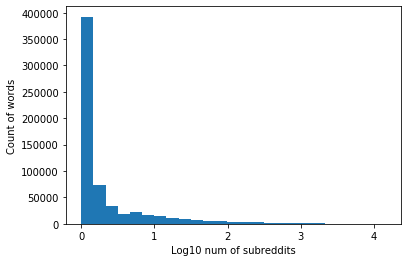

In [56]:
print(f"We have {len(df)} unique words and {len(d)} unique subreddits")
logD = {k:np.log10(v) for k, v in df.items()}
plt.hist(logD.values(), bins = 25)
plt.xlabel("Log10 num of subreddits")
plt.ylabel("Count of words")
plt.plot()

### Plotting with Counter (not sure if it works with non-integers...)

In [89]:
# sub_reddit = 'america' #america #politics # theoffice
# topN = 10
# c = Counter(sub_dict[sub_reddit]) #create counter

# most_common = c.most_common(topN) # get topN tf-idf
# most_common

# plt.bar(range(len(most_common)), [val[1] for val in most_common], align='center')
# plt.xticks(range(len(most_common)), [val[0] for val in most_common])
# plt.xticks(rotation=70)
# plt.title(sub_reddit)
# plt.show()

### Plotting sorted dict

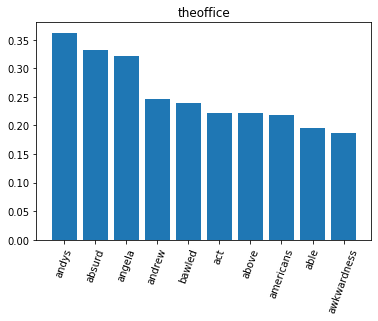

In [99]:
sub_reddit = 'theoffice' # theoffice
topN = 10
x = list(dict(sorted(sub_dict[sub_reddit].items(), 
                           key=lambda item: item[1], reverse = True)
                    [:topN]).keys())
y = list(dict(sorted(sub_dict[sub_reddit].items(), 
                           key=lambda item: item[1], reverse = True)
                    [:topN]).values())


plt.bar(x,y, align='center')
plt.xticks(rotation=70)
plt.title(sub_reddit)
plt.show()